<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/EDA%20CALLS%20911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# el archivo lo tengo en el mac en la carpeta trabajo master y se llama kaggle.json
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [3]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [4]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder. 

In [ ]:
"""# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
! kaggle datasets download arenagrenade/the-complete-pokemon-images-data-set
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”"""

In [5]:
! kaggle datasets download mchirico/montcoalert

 74% 18.0M/24.2M [00:00<00:00, 91.2MB/s]
100% 24.2M/24.2M [00:00<00:00, 104MB/s] 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [7]:
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/montcoalert.zip") # esta es la dirección donde esta el zip
datazip.extract("911.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 


'/content/911.csv'

In [8]:
data = pd.read_csv("/content/911.csv")

In [9]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:

column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e'] # aqui lo que estamos haciendo es cambiando el nombre de las columnas de arriba. 
data.columns = column # las metemos en la columna
data.drop('e', axis=1, inplace=True) # eliminamos la columna e

data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   latitude     663522 non-null  float64
 1   longitude    663522 non-null  float64
 2   description  663522 non-null  object 
 3   zipcode      583323 non-null  float64
 4   title        663522 non-null  object 
 5   timestamp    663522 non-null  object 
 6   township     663229 non-null  object 
 7   address      663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [12]:
data.dtypes

latitude       float64
longitude      float64
description     object
zipcode        float64
title           object
timestamp       object
township        object
address         object
dtype: object

In [13]:
data.describe()

,latitude,longitude,zipcode
count,663522.000000,663522.000000,583323.000000
mean,40.158162,-75.300105,19236.055791
std,0.220641,1.672884,298.222637
min,0.000000,-119.698206,1104.000000
25%,40.100344,-75.392735,19038.000000
50%,40.143927,-75.305143,19401.000000
75%,40.229008,-75.211865,19446.000000
max,51.335390,87.854975,77316.000000


In [14]:
pd.set_option("display.float_format", "{:.2f}".format) # con esto lo estoy dejando en dos decimales. 
data.describe()
# con esto podemos comparar la media con la mediana 50%, o comparar el 75% con el 100%. Lo que va del 75% en adelante son outliers. 

,latitude,longitude,zipcode
count,663522.00,663522.00,583323.00
mean,40.16,-75.30,19236.06
std,0.22,1.67,298.22
min,0.00,-119.70,1104.00
25%,40.10,-75.39,19038.00
50%,40.14,-75.31,19401.00
75%,40.23,-75.21,19446.00
max,51.34,87.85,77316.00


In [15]:
data.isna().sum() # con estos vemos los valores nulos por cada variable.

latitude           0
longitude          0
description        0
zipcode        80199
title              0
timestamp          0
township         293
address            0
dtype: int64

In [21]:
# ahora vamos a ver cuales son los 5 codigos postales que más se repiten.  
data["zipcode"].value_counts().head(5)

19401.00    45606
19464.00    43910
19403.00    34888
19446.00    32270
19406.00    22464
Name: zipcode, dtype: int64

In [22]:
data.columns

Index(['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp',
       'township', 'address'],
      dtype='object')

In [23]:
# cuales son las 5 townships que más se repiten. 
data["township"].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: township, dtype: int64

In [24]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [25]:
# vamos a ver cuantos titulos tenemos. 
data["title"].nunique()

148

In [27]:
# en el titulo podemos ver primero la razón que en el primero es EMS y luego el departamento. vamos a crear otra columna que nos indique la razón, separandola del title. 
data["Reason"] = data["title"].apply(lambda title: title.split(":")[0]) # entiendo que aquí lo que hacemos es buscar los dos puntos y quedarnos con la posición a la izquierda

In [28]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,Reason
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


In [29]:
# ahora vamos a ver cual es la razón que mas ocurre. 
data["Reason"].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

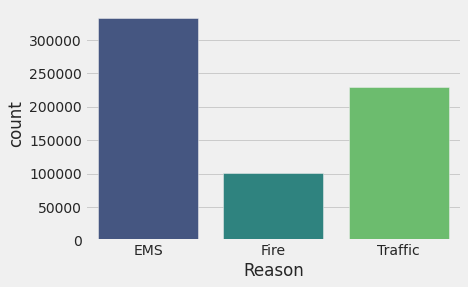

In [30]:
# ahora vamos a hacer un gráfico de lo de arriba. 
sns.countplot(x = "Reason", data= data, palette="viridis")

In [31]:
data.columns

Index(['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp',
       'township', 'address', 'Reason'],
      dtype='object')

In [32]:
# ahora vamos a ver que tipo tiene timestamp
type(data["timestamp"].iloc[0])
# y vemos que está en string. 

str

In [34]:
# lo vamos a convertir a fecha. 
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [35]:
type(data["timestamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
data.dtypes # aqui vemos que ya está en datatime. 

latitude              float64
longitude             float64
description            object
zipcode               float64
title                  object
timestamp      datetime64[ns]
township               object
address                object
Reason                 object
dtype: object